# Minilab
## Medical Patient No Show

### Team members: Luay Dajani, Dana Geislinger, Chris Morgan, Caroll Rodriguez
##### Github - https://github.com/cdmorgan103/7331DataMiningNoShow

MSDS 7331, 10/07/2018

#### Load and Prepare Dataset
<p>We are using the same dataset from Lab1 which includes the additional variables of age_range,  the split of date/time from Scheduled Day, Scheduled day of week, Appointment day of week and days in advance appointment was scheduled.  Additional modifications will be made for the requirements of the Minilab.</p>

In [1]:
# Import required modules
import numpy as np
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from pprint import pprint
from IPython.display import display
import seaborn as sns; sns.set(font_scale=1.2)

# Hide deprecation warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Load the data into variable 'df' from pickled object
from funcs import load_df
df = load_df()

# Get an overview of the raw data
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 19 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null category
ScheduledDay      110527 non-null datetime64[ns]
ScheduledTime     110527 non-null object
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null category
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMSReceived       110527 non-null int64
NoShow            110527 non-null bool
DaysInAdvance     110527 non-null int64
ScheduledDOW      110527 non-null category
AppointmentDOW    110527 non-null category
age_range         110527 non-null category
dtypes: bool(1), category(5), datetime64[ns](2), int64(10), object(1)
memory usage: 11.6+ MB


#### Remove ID variables
<p> Patient ID and Appointment ID are being removed because these add no value to our analysis.</p>

In [2]:
#Remove attributes not usefull
del df['PatientId']
del df['AppointmentID']

df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
Gender            110527 non-null category
ScheduledDay      110527 non-null datetime64[ns]
ScheduledTime     110527 non-null object
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null category
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMSReceived       110527 non-null int64
NoShow            110527 non-null bool
DaysInAdvance     110527 non-null int64
ScheduledDOW      110527 non-null category
AppointmentDOW    110527 non-null category
age_range         110527 non-null category
dtypes: bool(1), category(5), datetime64[ns](2), int64(8), object(1)
memory usage: 9.9+ MB


#### List Numeric Variables

Our cleaned dataset primarily consists of binary or ordinal predictors with levels stored as whole integer values. The two numeric variables of interest to us are DaysInAdvance, which describes the number of days a patient scheduled their appointment before it is meant to occur, and Age, which describes the age of the patient in years. DaysInAdvance ranged from 0 (same-day appointments) to 179 (about 6 months before the appointment) with an average of 10.2 days. This variable is highly right-skewed, with most patients opting to schedule their appointments no more than a couple of weeks beforehand (3rd quartile of 15 days). Age ranges from 0 (taken to mean an appointment for an infant under a year of age) to 115 years. Mean age is 37.1, indicating that the majority of patients in our data set are young to middle-aged adults and children.

In [3]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,DaysInAdvance
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.089218,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183792
std,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


#### Simple scatter plot of Continuous Features vs NoShow
<p>The plot below shows the age and the respective days in advance that an appointment was made. This plot shows a trend in the fewer days in advance you make an appointment, the more the higher the probability that there would be a noshow. </p> 

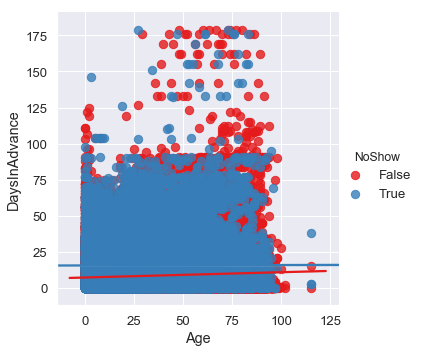

In [4]:
#plot
_ = sns.lmplot('Age','DaysInAdvance', data=df, hue='NoShow', palette='Set1', fit_reg=True, scatter_kws={"s": 70})

In [5]:
# NOTE: calling describe when not all the data is categorical will cause the 
# categorical variables to be removed
df[['Age', 'age_range','ScheduledDay','ScheduledTime','AppointmentDay',
    'Gender','age_range','Neighbourhood','Scholarship',
    'Hypertension','Diabetes','Alcoholism','Handicap',
    'SMSReceived','ScheduledDOW','AppointmentDOW','NoShow']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,110527.0,37.089218,23.109921,0.0,18.0,37.0,55.0,115.0
Scholarship,110527.0,0.098266,0.297675,0.0,0.0,0.0,0.0,1.0
Hypertension,110527.0,0.197246,0.397921,0.0,0.0,0.0,0.0,1.0
Diabetes,110527.0,0.071865,0.258265,0.0,0.0,0.0,0.0,1.0
Alcoholism,110527.0,0.030400,0.171686,0.0,0.0,0.0,0.0,1.0
Handicap,110527.0,0.022248,0.161543,0.0,0.0,0.0,0.0,4.0
SMSReceived,110527.0,0.321026,0.466873,0.0,0.0,0.0,1.0,1.0


#### One Hot Encode Variables
<p>We will create dummy variables for our categorical predictors in order to build a logistic regression model with scikit learn.</p>

In [6]:
# perform one-hot encoding of the categorical data 
tmp_df = pd.get_dummies(df.Handicap,prefix='Handicap')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df.AppointmentDOW,prefix='AppointmentDOW')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df.ScheduledDOW,prefix='ScheduledDOW')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df.Neighbourhood,prefix='Neighbourhood')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df.age_range,prefix='age_range')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

Gender is currently stored as a categorical variables stored as 'M' (Male) or 'F' (Female). To format this variable in the same way as other predictors in our dataset, we will re-code this variable as 0 (Female) or 1 (Male).

In [7]:
# replace the current Gender attribute with something slightly more intuitive and readable
df['IsMale'] = df.Gender=='M' 
df.IsMale = df.IsMale.astype(np.int)

df.IsMale.describe()

count    110527.000000
mean          0.350023
std           0.476979
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: IsMale, dtype: float64

#### Remove variables
<p>Since we have new one-hot encoded variables for each categorical predictor, we will remove the old formatted predictors from our data.</p>

In [8]:
# Now let's clean up the dataset
if 'Gender' in df:
    del df['Gender'] # if 'Sex' column still exists, delete it (as we created an ismale column)
    
if 'Handicap' in df:    
    del df['Handicap'] # get rid of the original category as it is now one-hot encoded
    
if 'ScheduledDOW' in df:    
    del df['ScheduledDOW'] # get rid of the original category as it is now one-hot encoded
    
if 'AppointmentDOW' in df:    
    del df['AppointmentDOW'] # get rid of the original category as it is now one-hot encoded

if 'Neighbourhood' in df:    
    del df['Neighbourhood'] # get rid of the original category as it is now one-hot encoded

if 'age_range' in df:
    del df['age_range']

if 'AppointmentID' in df:
    del df['AppointmentID']
    
if 'ScheduledDay' in df:
    del df['ScheduledDay']
    
if 'ScheduledTime' in df:
    del df['ScheduledTime']

if 'AppointmentDay' in df:
    del df['AppointmentDay']

In [9]:
df.head()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMSReceived,NoShow,DaysInAdvance,Handicap_0,Handicap_1,...,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,age_range_child,age_range_adult,age_range_senior,IsMale
0,62,0,1,0,0,0,False,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,56,0,0,0,0,0,False,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,62,0,0,0,0,0,False,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8,0,0,0,0,0,False,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,56,0,1,1,0,0,False,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Create Models (50pts))

In [10]:
# Import additional libraries
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

 #Preset visualization preferences
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#### List of Predictors
<p>Performing one-hot encoding has increased the number of predictor variables in our data set from 15 to 112, because we now have separate binary variables for each level of each of our categorical predictors. </p>

In [11]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 112 columns):
Age                                          int64
Scholarship                                  int64
Hypertension                                 int64
Diabetes                                     int64
Alcoholism                                   int64
SMSReceived                                  int64
NoShow                                       bool
DaysInAdvance                                int64
Handicap_0                                   uint8
Handicap_1                                   uint8
Handicap_2                                   uint8
Handicap_3                                   uint8
Handicap_4                                   uint8
AppointmentDOW_Monday                        uint8
AppointmentDOW_Tuesday                       uint8
AppointmentDOW_Wednesday                     uint8
AppointmentDOW_Thursday                      uint8
AppointmentDOW_Friday 

#### Binary Variable - No Show
For our response variable *NoShow*, a value of *True* represents that a patient did not show up for their scheduled appointment. We will work to build a logistic regression model that will predict a no-show based on the above predictors.<br><br>
As is evidenced below, no-show appointments represent approximately 20.2% of the total number of appointments for which we have data (110,527 appointments in total).

In [12]:
df['NoShow'].value_counts()

False    88208
True     22319
Name: NoShow, dtype: int64

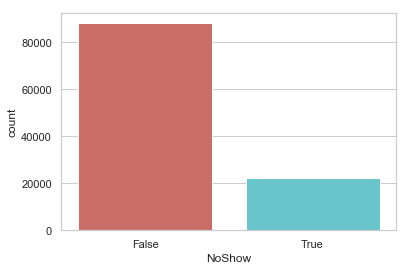

<Figure size 432x288 with 0 Axes>

In [13]:
_ = sns.countplot(x='NoShow', data=df, palette='hls', label=True)
plt.show()
plt.savefig('./images/count_plot')

In [14]:
count_NoShow = len(df[df['NoShow']==0])
count_Show = len(df[df['NoShow']==1])
pct_of_Show = count_NoShow/(count_NoShow+count_Show)
pct_of_NoShow = count_Show/(count_NoShow+count_Show)
print("The percentage of no-shows is {:.2f}%".format(pct_of_NoShow*100))
print("The percentage of shows is {:.2f}%".format(pct_of_Show*100))

The percentage of no-shows is 20.19%
The percentage of shows is 79.81%


#### Creating Numpy Matrices
We create *numpy* matrices to store our response and predictor data from which we will build the model:
- y is our Response Variable NoShow. 
- X is an array containing all the variables that are being used as predictors. NoShow is removed from this array, since it will be used for training the model.

In [15]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'NoShow' in df:
    y = df['NoShow'].values # get the labels we want
    df_x = df.copy()
    del df_x['NoShow'] # get rid of the class label
    X = df_x.values # use everything else to predict!
    
    df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 112 columns):
Age                                          int64
Scholarship                                  int64
Hypertension                                 int64
Diabetes                                     int64
Alcoholism                                   int64
SMSReceived                                  int64
NoShow                                       bool
DaysInAdvance                                int64
Handicap_0                                   uint8
Handicap_1                                   uint8
Handicap_2                                   uint8
Handicap_3                                   uint8
Handicap_4                                   uint8
AppointmentDOW_Monday                        uint8
AppointmentDOW_Tuesday                       uint8
AppointmentDOW_Wednesday                     uint8
AppointmentDOW_Thursday                      uint8
AppointmentDOW_Friday 

#### Split Dataset (Train / Test)
<p>We created a cross validation object (cv_object) with 3 folds cross validation in which 20% of the data will be for testing and 80% for training the model. ShuffleSplit randomly samples the training and test portions, so we also set a seed value to ensure that the same random splits will be used each time we run the code.</p>

In [16]:
## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
#    have converted them into simple matrices to use with scikit learn
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,
                         train_size=0.8,
                         random_state=123456789)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=123456789, test_size=0.2,
       train_size=0.8)


### Model 1 : Logistic Regression
##### Assumptions Met:
* Binary logistic regression requires the dependent variable to be binary.
* For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
* The independent variables are linearly related to the log odds.
* Logistic regression requires quite large sample sizes.

ref: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

##### Grid Search
<p>A grid search will help determine the optimal parameters to pass to the logistic regression function. Finding the optimal parameters will help with model prediction.</p>
<p>Some parameters are being selected as the only option due to the type of dataset. We will try using a solver with a default parameter 'lbfgs' for binomial problems, although sag and saga are faster for larger datasets.</p>
<p>The multi-class parameter is set to the default of 'ovr' because we have a binary problem.

In [17]:
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X, y, scoring=['accuracy','precision','recall']
                            , cv=cv_object, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']

    return scoresResults

def EvaluateClassifierEstimator2(classifierEstimator, X, y, cv_object):
    
    #Perform cross validation 
    from sklearn.model_selection import cross_val_predict
    predictions = cross_val_predict(classifierEstimator, X, y, cv=cv_object)
    
    #model evaluation 
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    #pass true test set values and predictions to classification_report
    classReport = classification_report(y,predictions)
    confMat = confusion_matrix(y,predictions)
    acc = accuracy_score(y,predictions)
    
    print(classReport)
    print(confMat)
    print(acc)

Upon researching the possible parameters to LogisticRegression from sklearn, we decided that the most important parameters of interest were C (the inverse of regularization strength, which must be a positive floating point value) and max_iter (the maximum number of iterations for the lbfgs solver to use). The default values for these parameters are 1.0 and 100 respectively, and we have included a range of potential values for these parameters that might help improve our model accuracy.

In [18]:
from sklearn.linear_model import LogisticRegression
regEstimator = LogisticRegression()


parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, .5, 1, 10,100]
              ,'class_weight': [ 'none']
              ,'random_state': [123456789]
              ,'solver': ['lbfgs']
              ,'max_iter':[100,500,1000]
             }


#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_object # KFolds = 3
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  3.0min
[Parallel(n_jobs=8)]: Done  63 out of  63 | elapsed:  6.4min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=123456789, test_size=0.2,
       train_size=0.8),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100], 'class_weight': ['none'], 'random_state': [123456789], 'solver': ['lbfgs'], 'max_iter': [100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

<p>By performing a grid search, the best parameters to pass into the Logistic Regression are identified for us. Below is the best estimator parameters for class weight and cost without scaling the data. The optimal values were estimated to be 0.01 for C (100 times smaller than the default 1.0 value) and 500 for max_iter (5 times greater than the default value of 100).

In [19]:
#Diplay the top model parameters
regGridSearch.best_estimator_

LogisticRegression(C=0.01, class_weight='none', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=500,
          multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=123456789, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

With these optimal function parameters defined, we create a logistic regression model, train it will our randomly selected training dataset, and fit the model to test our accuracy in predicting the test portion of the dataset.

In [20]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt


# first we create a reusable logisitic regression objectpenalty
#   here we can setup the object with different learning parameters and constants
lr_clf = regGridSearch.best_estimator_ # get object

    #NOTE: as you increase C, test diff values by grid search
    #another par is balanced=TRUE/FALSE instead of class weight
    
# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration

# this does the exact same thing as the above block of code, but with shorter syntax

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object builds the model
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions (yhat)

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

====Iteration 0  ====
accuracy 0.7985162399348593
confusion matrix
 [[17574   135]
 [ 4319    78]]
====Iteration 1  ====
accuracy 0.7952139690581742
confusion matrix
 [[17511   115]
 [ 4412    68]]
====Iteration 2  ====
accuracy 0.7912783859585633
confusion matrix
 [[17418   139]
 [ 4475    74]]


In [21]:
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.79851624 0.79521397 0.79127839]


With the parameters for the Logistic Regression optimized, we have created a model that gives us 78-79% accuracy.

In [22]:
#Use the best parameters for our Linear Regression object
classifierEst = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst, X, y, cv_object)

The average accuracy for all cv folds is: 			 0.795
The average precision for all cv folds is: 			 0.36173
The average recall for all cv folds is: 			 0.016395
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.798516,0.366197,0.017739
1,0.795214,0.371585,0.015179
2,0.791278,0.347418,0.016267


We also created a color-coded confusion matrix to further investigate how our model performed in terms of false-positive and false-negative predictions. We see from this matrix that the majority of our errors come from the model being overly conservative and predicting False for NoShow when patients really did not show up for their appointments (4,475 True NoShow's predicted as False). With our model being conservative, it correctly classified almost all of the False NoShows in the test set, with only 138 of 22,106 appointments incorrectly predicted as NoShows when the patients did show up for their appointment. However, as mentioned before the predictions of True NoShows was very poor, with only 74 of 4,549 NoShow patients being correctly predicted as not showing up for their appointments. To summarize, our logistic regression model has fairly strong specificity (correctly predicted Falses) but poor sensitivity (did not correctly categorize most True appointments).

In [23]:
import numpy as np 

import seaborn as sns
from sklearn import metrics
# Use score method to get accuracy of model
score = lr_clf.score(X[test_indices], y[test_indices])

predictions = lr_clf.predict(X[test_indices])

cm = metrics.confusion_matrix(y[test_indices], predictions)

#### Plot - Model Accuracy - Unscaled Dataset

FileNotFoundError: [Errno 2] No such file or directory: './image/ConfMatrix1.png'

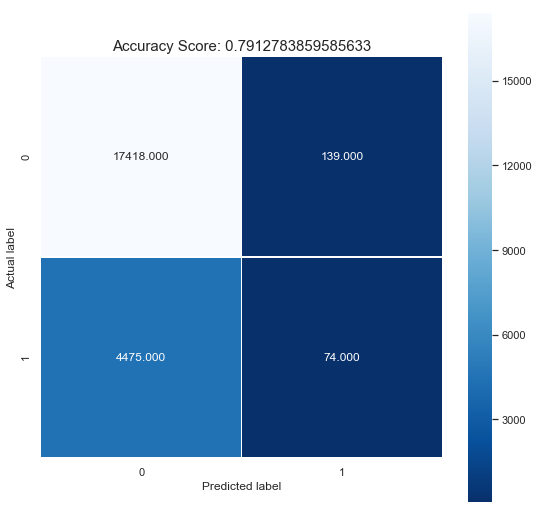

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('./image/ConfMatrix1.png')
#plt.show();

#### Scaled Dataset
<p>The previous model was built without scaling the values of predictors in our dataset. While we have relatively few predictors that vary by scale (only Age and DaysInAdvance), these variables being on different scales than the categorical variables could have influenced our model. To account for this, we will scale our predictors, rebuild our model, and check its accuracy in comparison to the previous un-scaled model. In order to get the same results each time the code is run, we make sure to supply the same seed value (random_state) that was used previously.

In [ ]:
#Scale dataset converting to standard normally distributed data 
# (e.g. Gaussian with 0 mean and unit variance).
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

#Fit to data for scaling
scaler = StandardScaler()
scaler.fit(X)

#Transform training data to z-scores
#This makes our model's coefficients take on the same scale for accurate feature importance analisys 
X_scaler = scaler.transform(X)

In [ ]:
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X_scaler, y, cv_object):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X_scaler, y, scoring=['accuracy','precision','recall']
                            , cv=cv_object, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']

    return scoresResults

def EvaluateClassifierEstimator2(classifierEstimator, X_scaler, y, cv_object):
    
    #Perform cross validation 
    from sklearn.model_selection import cross_val_predict
    predictions = cross_val_predict(classifierEstimator, X_scaler, y, cv=cv_object)
    
    #model evaluation 
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    #pass true test set values and predictions to classification_report
    classReport = classification_report(y,predictions)
    confMat = confusion_matrix(y,predictions)
    acc = accuracy_score(y,predictions)
    
    print(classReport)
    print(confMat)
    print(acc)

In [ ]:
from sklearn.linear_model import LogisticRegression
regEstimator = LogisticRegression()


parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, .5, 1, 10]
              ,'class_weight': [ 'none']
              ,'random_state': [123456789]
              ,'solver': ['lbfgs']
              ,'max_iter':[100,500]
             }


#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_object # KFolds = 5
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_scaler, y)

With our scaled dataset, the predictors recommended by grid search are slightly different. C is recommended to be 0.001 (10x less than the unscaled recommendation and 1,000x less than the default value) and max_iter is recommended to be 100 (5x less than what was previously recommended for the unscaled data but equal to the default variable value). These changes must be due to the fact that our data is now represented in a normal scale, and indicates the importance of scaling the data before performing model optimization techniques such as grid search.

In [ ]:
#Diplay the top model parameters
regGridSearch.best_estimator_

In [ ]:
#Use the best parameters for our Linear Regression object
classifierEst = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst, X_scaler, y, cv_object)

In [ ]:
# here we can change some of the parameters interactively with class_weight: 0 = none or 1 = balanced
from ipywidgets import widgets as wd
def lr_explor2(classweight,cost):
    classwt = None
    if classweight == 1:
        classwt = 'balanced'
    lr_clf2 = LogisticRegression(penalty='l2', C=cost, class_weight=classwt) # get object
    accuracies = cross_val_score(lr_clf2,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

_ = wd.interact(lr_explor2,classweight=(0,1),cost=(0.001,5.0,0.05),__manual=True)

By scaling the predictors in our dataset, the overall accuracy average did not improve by a meaningful amount, although the average is very slightly higher with the scaled X values. This is likely because we only have 2 variables (Age, DaysInAdvance) in the dataset that would be effected by scaling, and those variables may not be the most important predictors in the model. Nevertheless, this exercise is important because it allows us to show that our model accuracy is not being significantly detrimentally affected by having our continuous variables on a separate scale. 

# SVM analysis

Next we will investigate using SVM to predict Show/No-show patients. Because of our large sample size and complexity of data, stochastic gradient descent will be required.

## Start with SGD

We will begin our analysis with a fairly standard model and utilize the same train/test data as the logistic regression

In [ ]:
%%time
# use some compact notation for creating a linear SVM classifier with stichastic descent
from sklearn.linear_model import SGDClassifier

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter=iterations, n_jobs=-1, penalty='l1',random_state=0)

scl = StandardScaler()
for train_indices, test_indices in cv_object.split(X,y):
    svm_sgd.fit(scl.fit_transform(X[train_indices]),y[train_indices])
    yhat = svm_sgd.predict(scl.transform(X[test_indices]))
    
    conf2 = mt.confusion_matrix(y[test_indices],yhat)
    acc2 = mt.accuracy_score(y[test_indices],yhat)

print('SGD Accuracy:', acc2)
print(conf2)


### SGD Hinge results analysis
On first glance, this appears to be a very accurate model with an accuracy of approximately 0.8 using the default hinge loss method.

In actuality, its predictive capabilities using the default method is practically worthless as the model is simply predicting all individuals as "show" and is predicting 0 actual no-shows. Because of this we will examine other model input parameters to find a more practically usable model

Examination of different options was performed and the most practical model is below.

In [ ]:
# use some compact notation for creating a linear SVM classifier with stichastic descent
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

regularize_const = .5
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter=iterations, n_jobs=-1, penalty='none',random_state=0)

scl = StandardScaler()
for train_indices, test_indices in cv_object.split(X,y):
    svm_sgd.fit(scl.fit_transform(X[train_indices]),y[train_indices])
    yhat = svm_sgd.predict(scl.transform(X[test_indices]))
    
    conf2 = mt.confusion_matrix(y[test_indices],yhat)
    acc2 = mt.accuracy_score(y[test_indices],yhat)

print('SGD Accuracy:', acc2)
print(conf2)

### Analysis
After examining multiple model variables, we can reasonably increase model no-show yield by switching to a log loss function, remove penalty with the 'penalty=none' option, and increase the alpha factor to 0.5. 

While this does significantly increase false positive results, and interestingly false positives have tended to stay around twice the total true negative predictions when tweaking parameters, it does create more potential yield to create actual usable/actionable information for the clinic.

The yield could potentially be increased further at the potential expense of some accuracy. This would allow us to optimize for target prediction levels that could then allow business leaders to potentially overbook or follow up further with patients before appointments to prevent a potential no-show. A data scientist ideally would work with the business leader to see what level of predictions the clinic could practically handle and attempt to tune the model to those parameters. 

Removing a penalty factor is a concerning effort that should reasonably cause concerns, however, the reality of this effort appears to show SGD/SVM as not practically useful for predicting no-shows so it seems a reasonable compromise to reach a potential area to allow for further testing (i.e. continuing to collect data and validate model performance over a period of time to ensure the results given are not simply from overfitting).

For the purpose of our analysis though, we will settle with these reasonable results.

## Model Advantages (10pts)

In [ ]:
# Print our model accuracies for both logistic reg and SVM
print("Average Logistic Regression Accuracy:")
print(sum(accuracies)/3)
print("Average SVM Accuracy:")
print(acc2)
print("Logistic Regression Confusion Matrix:")
print(cm)
print("SVM Confusion Matrix:")
print(conf2)


From the above analysis, we can see that there is little change in overall accuracy between the two models (roughly 77-79% in both cases). However, with SVM we had a significant problem with precision; when run with a hinge loss function, the SGD classifier was overly conservative, and did not predict ANY appointments as being a no-show. As such, the accuracy was reasonably high, but only because approximately 80% of the data was from False for NoShow, so by predicting every value as False a roughly 80% prediction rate was attained.

When we instead used a log loss function (as recommended for logistic regression in the SciKit learn documentation), we get a much more reasonable confusion matrix, with 917 True predictions for NoShow. However, while having some True predictions is better than none, the proportion of correct True predictions is very poor with only 28.7% (263/917) of the True-predicted no-show appointments predicted by the SVM model actually being True no-shows.

Overall, the logistic model also had slightly higher overall accuracy (~2% more correctly predicted appointments). The logistic regression model and SVM models were both fairly quick to build overall. However, utilizing a grid search for either method was extremely computationally expensive (performed in the appendix for the SVM model), taking over 10 minutes to calculate the most optimal values for only a handful of parameters. This was the case for both the SVM and logistic regression models, so in our case we did not find either type of model to be computationally prohibitive.

Nevertheless, since the overall accuracy is highest with the logistic regression model and the linear SVM model had such poor precision (it predicted no True values), we conclude that logistic regression is superior in the case of our dataset. It is possible that more variables and levels could be optimized with grid search if computation time was no object, but as it stands we were not able to produce any results that would cause is to recommend SVM over logistic regression in this case.

Finally, interpretation of logistic regression coefficients is easier than interpreting SVM vector components because logistic regression coefficients can be mapped directly to log(odds). It is therefore much simpler to interpret the results of our linear regression model as either odds ratio or probability in terms of our response variable NoShow than it is to interpret the support vector values, since there are such a high number of dimensions (112 predictors when dummies are broken out from categorical variables) that the vector is splitting.

## Interpret Feature Importance (30pts)
<p>In this section, we examine each variable to see which ones are important and which are redundant. The first test is to determine as the individual weights of each variable:</p>

In [ ]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

<p>The problem here is that the weights compared are inaccurate as some of the continuous variables like age can be from 0 to over 100, while the binary categories can only be from 0 to 1. In this case, we create a scaled version of all of the predictors so that their ranges are all between 0 and 1 as shown below:</p>

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the X/Y_Train/Test variable to be used in the standard scaler below
X_train = X[train_indices]
y_train = y[train_indices]
    
X_test = X[test_indices]
y_test = y[test_indices]

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

warnings.filterwarnings('ignore')

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

As per the tall grid below, the importance of each variable, whether positive or negative, are compared against each other.  From analysis, the following conclusions may be drawn in order to reduce the dimensionality of the dataset:
- Gender (IsMale) does not greatly affect the predictions, though it seems like males are very slightly more likely to NoShow than Females.
- Age range does tend to factor in, but the child appointments have a strong negative effect while the adult and senior appointments have a relatively strong positive effect. The 2 latter age ranges have similar weights, which could be dropped to reduce redundancies.
- The Neighbourhood dummy variables represents 81 different Neighborhoods and the weight of each neighborhood's contribution to the model varies significantly.
- ScheduledDay does not significantly weight in the model and neither does the actual appointment date, though Friday seems to more positively affect the model while the rest show a slight negatively effect, if any effect at all.
- DaysInAdvanced seems to have a large weight and so does age and SMSReceived.
- Hypertension seems to have a minimal negative effect. 
- The rest: Alcoholism, Diabetes, and Scholarship have impacts which are relatively significant but may also be redundant.

In [ ]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(10, 30), dpi=80)

weights = pd.Series(lr_clf.coef_[0],index=df_x.columns)
weights.plot(kind='barh')
plt.show()

Based on the weights of the coefficients for the logistic regression model (shown above), the 3 most significantly weighted predictors are Age, DaysInAdvance and SMSReceived. These predictors all have coefficient values above 0.15 (or below -0.15 in the case of Age), meaning that they contribute the most heavily to the model. It is interesting to note that the 2 highest weighted variables are our 2 continuous predictors (Age and DaysInAdvance). Regardless, we are confident that these variables have the highest contribution to the model since the variables were scaled to match the other categorical predictor scales prior to the weighting of these coefficients.

In [ ]:
df_top_weights = pd.DataFrame(lr_clf.coef_[0], index=df_x.columns)
df_top_weights = df_top_weights.loc[['Age','DaysInAdvance','SMSReceived'],:]
df_top_weights = df_top_weights.apply(abs)

summary_plot = df_top_weights.plot(kind='barh', legend=False)
__ = summary_plot.set(xlabel=("Magnitude of Coefficient"))

## Interpret Support Vectors (10pts)

Since we had to use stochastic gradient descent because of the size of our data, we will now attempt to subsample the data and create an svm model for support vector analysis.

In [ ]:
#create random sample of train test data to make analysis computationally feasible
import random
randtrain=random.sample(list(train_indices),12000)
randtest=random.sample(list(test_indices),3000)
X_train2=X[randtrain]
y_train2=y[randtrain]
X_test2=X[randtest]
y_test2=y[randtest]

In [ ]:
#scales the data
from sklearn.preprocessing import StandardScaler
#use same train indicies
scl_obj = StandardScaler()

scl_obj.fit(X_train2) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train2) # apply to training
X_test_scaled = scl_obj.transform(X_test2) # apply those means and std to the test set (without snooping at the test set values)


In [ ]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(kernel='linear', probability=True, ) # get object
svm_clf.fit(X_train_scaled, y_train2,)  # train object

y_hat2 = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test2,y_hat2)
conf = mt.confusion_matrix(y_test2,y_hat2)
svmcoef=svm_clf.coef_
print('accuracy:', acc )
print(conf)

# look at the support vectors
print('SVM vectors')
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

### Analysis of support vectors
Here again we see how a linear svm does not practically appear to be an appropriate solution for this use case. 

While we maintain a good accuracy, we are not actually predicting any no shows, so this model has little practical significance and a different kernel would likely be required to reach reasonable results. This effectively tells us that we cannot reasonably draw a dividing line with a linear svm given the overlap in our data in multidimensional space.

Regardless, we will interpret the svm coefficients next as the assignment calls for using a linear methodology.

In [ ]:
#plots linear svm coefficients
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(10, 28), dpi=80)

weights = pd.Series(svmcoef[0],index=df_x.columns)
weights.plot(kind='barh')
plt.show()

### SVM coefficient analysis
Examining our coefficients shows that some variables are stronger than others for influencing positive/negative (noshow/show) result, but overall there are no huge standout variables for this svm.

We do see appointments for DOW Fri having a strong negative coefficient, and Age having a stronger positive coefficient, but relatively speaking they are not dramatically larger than other coefficients.

In [ ]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]
dfg=df
df_support['NoShow'] = y[svm_clf.support_] # add back in noshow
dfg['NoShow'] = y # also add it back in for the original data
df_support.info()

In [ ]:
# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = dfg.groupby(['NoShow'])
df_grouped = dfg.groupby(['NoShow'])

# plot KDE of Different variables
vars_to_plot = ['Age','AppointmentDOW_Friday','age_range_senior',
                'Neighbourhood_CONQUISTA','Handicap_2']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['True','False'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['True','False'])
    plt.title(v+' (Original)')

### SVM vs original analysis

Examining our coefficients shows that some variables are stronger than others for influencing positive/negative (show/noshow) result, but overall there are no huge standout variables for this svm.

We do see appointments for DOW Fri being strong negative coefficient, and Age being a stronger positive coefficient, but relatively speaking they are not dramatically larger than other coefficients.

The lack of strong coefficient does seem to line up well with what our svm model shows compared to the actual data. In the charts above, it is clear that while separation exists, it is very small relative to the whole which reinforces that this is naturally a challenging result to predict.

In [ ]:
# rbf analysis
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(kernel='rbf', probability=True, ) # get object
svm_clf.fit(X_train2, y_train2,)  # train object

y_hat2 = svm_clf.predict(X_test2) # get test set precitions

acc = mt.accuracy_score(y_test2,y_hat2)
conf = mt.confusion_matrix(y_test2,y_hat2)
print('accuracy:', acc )
print(conf)

### Additional rbf analysis
While rbf analysis was not required for the effort, it does appear more effective for the use case in that it can return actual no-show appointments, and while the accuracy is technically lower, it provides a level of potential usefulness to the user and would likely be a better choice in a real world scenario if one wanted to attempt corrective action and prevent potential no-shows with extra follow up calls before appointment.

### Appendix

What follows is extra work we did in trying to figure out the best way to implement SGDClassifier with our dataset, per: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

The following are potential loss parameters we tested:
* ‘hinge’
* ‘log’
* ‘modified_huber’
* ‘squared_hinge’
* ‘perception’

Penalty options:
* ‘none’
* ‘l2’
* ‘l1’
* ‘elasticnet’

l1 and hinge result in a 0 false prediction, which may have legitimate value from an operational standpoint. In the end, we did not find it necessary to include these in our final analysis, but are including the work we did in analyzing them for posterity.

In [ ]:
# use some compact notation for creating a linear SVM classifier with stichastic descent
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='modified_huber', n_iter=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()
for train_indices, test_indices in cv_object.split(X,y):
    svm_sgd.fit(scl.fit_transform(X[train_indices]),y[train_indices])
    yhat = svm_sgd.predict(scl.transform(X[test_indices]))
    
    conf2 = mt.confusion_matrix(y[test_indices],yhat)
    acc2 = mt.accuracy_score(y[test_indices],yhat)

print('SVM Accuracy:', acc2)
print(conf2)

In [ ]:
# use some compact notation for creating a linear SVM classifier with stichastic descent
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='modified_huber', n_iter=iterations, n_jobs=-1, penalty='l1')

scl = StandardScaler()
for train_indices, test_indices in cv_object.split(X,y):
    svm_sgd.fit(scl.fit_transform(X[train_indices]),y[train_indices])
    yhat = svm_sgd.predict(scl.transform(X[test_indices]))
    
    conf2 = mt.confusion_matrix(y[test_indices],yhat)
    acc2 = mt.accuracy_score(y[test_indices],yhat)

print('SVM Accuracy:', acc2)
print(conf2)

In [ ]:
# use some compact notation for creating a linear SVM classifier with stichastic descent
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='modified_huber', n_iter=iterations, n_jobs=-1, penalty='none')

scl = StandardScaler()
for train_indices, test_indices in cv_object.split(X,y):
    svm_sgd.fit(scl.fit_transform(X[train_indices]),y[train_indices])
    yhat = svm_sgd.predict(scl.transform(X[test_indices]))
    
    conf2 = mt.confusion_matrix(y[test_indices],yhat)
    acc2 = mt.accuracy_score(y[test_indices],yhat)

print('SVM Accuracy:', acc2)
print(conf2)

In [ ]:
# use some compact notation for creating a linear SVM classifier with stichastic descent
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

regularize_const = .5
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='modified_huber', n_iter=iterations, n_jobs=-1, penalty='none',random_state=0)

scl = StandardScaler()
for train_indices, test_indices in cv_object.split(X,y):
    svm_sgd.fit(scl.fit_transform(X[train_indices]),y[train_indices])
    yhat = svm_sgd.predict(scl.transform(X[test_indices]))
    
    conf2 = mt.confusion_matrix(y[test_indices],yhat)
    acc2 = mt.accuracy_score(y[test_indices],yhat)

print('SGD Accuracy:', acc2)
print(conf2)

In [ ]:
from sklearn.linear_model import SGDClassifier
 
 
#parameters = {'alpha':[0.0001, 0.01, 0.1, .25, .5,.75,1]
            #  , 'penalty':['l2', 'l1','none','elasticnet']
             # ,'l1_ratio': [0.0, 0.15, 0.5, 1]
             # ,'fit_intercept': ['True', 'False']
             # ,'random_state': [0]
             # ,'loss': ['hinge','log','modified_huber']
            #  ,'iterations':[5]
             #}
regEstimator = SGDClassifier()
 
parameters = {'alpha':[0.0001, 0.01, 0.1, .25, .5,.75,1]
              #, 'penalty':['none']
             # ,'l1_ratio': [0.01]
              #,'fit_intercept': ['True']
              #,'random_state': [0]
             # ,'loss': ['log']
            # , 'learning_rate':['optimal']
             }
 
 
#Create a grid search object using the 
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_object # KFolds = 5
                   , scoring='accuracy')
 
#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

In [ ]:
#Use the best parameters for our Linear Regression object
classifierEst = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst, X, y, cv_object)